## Importerer pakker

In [79]:
# Data Manipulation and Visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Data Preprocessing


# Model Selection and Evaluation
from sklearn.model_selection import train_test_split


## Leser inn renset fil

In [80]:
df_train = pd.read_csv('train_df.csv')
pd.set_option('display.max_columns', None)
pd.reset_option('display.float_format')

## Beskrivelse av data

In [66]:
df_train.describe()

oppholdslengde        alder    utdanning      inntekt   sykehusdød  \
count     5413.000000  5411.000000  4458.000000  3262.000000  5413.000000   
mean        17.646037    62.882462    11.692463     0.669221     0.263994   
std         21.417539    15.563223     3.425327     0.776868     0.440837   
min          3.000000    18.000000     0.000000     0.000000     0.000000   
25%          6.000000    53.000000    10.000000     0.000000     0.000000   
50%         11.000000    65.000000    12.000000     0.000000     0.000000   
75%         20.000000    74.000000    14.000000     1.000000     1.000000   
max        343.000000   102.000000    30.000000     2.000000     1.000000   

         blodtrykk  hvite_blodlegemer  hjertefrekvens  respirasjonsfrekvens  \
count  5413.000000        5287.000000     5413.000000           5413.000000   
mean     84.043137          12.296699       97.163809             23.344541   
std      27.696513           9.112109       31.677984              9.550372   
min       0.000000           0.000000        0.000000              0.000000   
25%      63.000000           7.000000       72.000000             18.000000   
50%      77.000000          10.599609      100.000000             24.000000   
75%     107.000000          15.199219      120.000000             28.000000   
max     195.000000         128.781250      232.000000             70.000000   

       kroppstemperatur  lungefunksjon  serumalbumin    bilirubin  \
count       5413.000000    4032.000000   3421.000000  3879.000000   
mean          37.119087     239.561151      2.951390     2.511476   
std            1.259334     109.983061      0.925699     5.145024   
min           31.699220      12.000000      0.399963     0.099991   
25%           36.195310     155.000000      2.399902     0.500000   
50%           36.695310     223.781250      2.899902     0.899902   
75%           38.195310     304.750000      3.599609     1.899902   
max           41.695310     869.375000     29.000000    54.796875   

         kreatinin      natrium      blod_ph      glukose  blodurea_nitrogen  \
count  5373.000000  5413.000000  4048.000000  2730.000000        2820.000000   
mean      1.792238   137.528173     7.414502   160.983883          32.562766   
std       1.696566     6.040926     0.081907    91.650084          26.841539   
min       0.099991   110.000000     6.829102     1.399902           1.000000   
25%       0.899902   134.000000     7.379883   103.000000          14.000000   
50%       1.199951   137.000000     7.419922   134.000000          24.000000   
75%       1.899902   141.000000     7.469727   191.000000          42.000000   
max      18.398438   181.000000     7.769531  1092.000000         192.000000   

        urinmengde     dødsfall  antall_komorbiditeter   koma_score  \
count  2523.000000  5413.000000            5413.000000  5413.000000   
mean   2171.097474     0.684463               1.860521    12.529281   
std    1440.312021     0.464772               1.329889    25.197060   
min       0.000000     0.000000               0.000000     0.000000   
25%    1172.500000     0.000000               1.000000     0.000000   
50%    1941.000000     1.000000               2.000000     0.000000   
75%    2990.000000     1.000000               3.000000     9.000000   
max    9000.000000     1.000000               7.000000   100.000000   

       fysiologisk_score  apache_fysiologisk_score  overlevelsesestimat_2mnd  \
count        5413.000000                5413.00000               5413.000000   
mean           25.608652                  37.87179                  0.631458   
std            10.040329                  20.05021                  0.250473   
min             0.199982                   0.00000                  0.000000   
25%            19.000000                  23.00000                  0.498962   
50%            24.097656                  35.00000                  0.710938   
75%            30.296875                  49.00000        

## Korrelasjonsmatrise for alle variabler

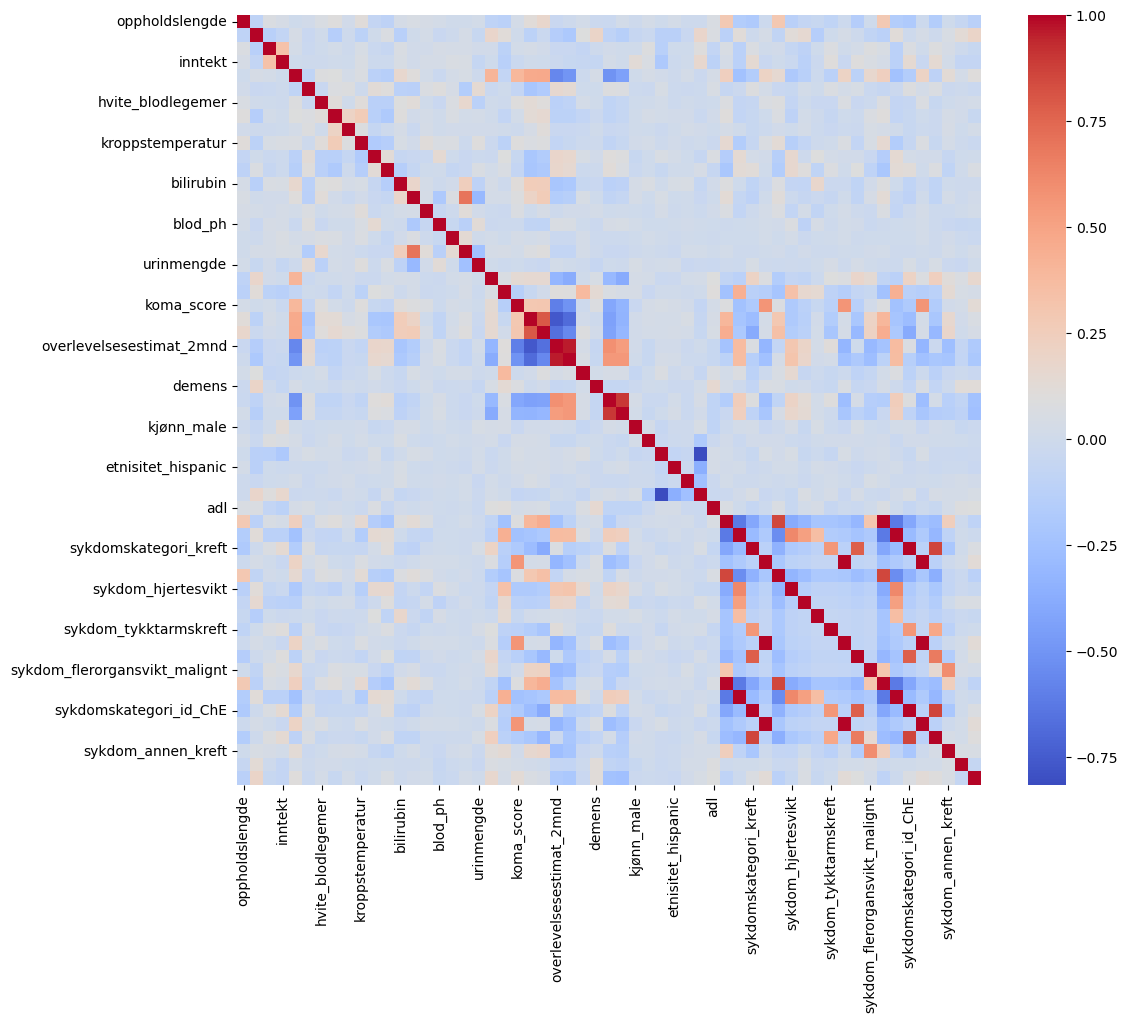

In [67]:
corr_matrix = df_train.corr()
sns.heatmap(corr_matrix, cmap="coolwarm")
plt.gcf().set_size_inches(12, 10)

## Korrelasjonsmatrise avhengig av oppholdslengde

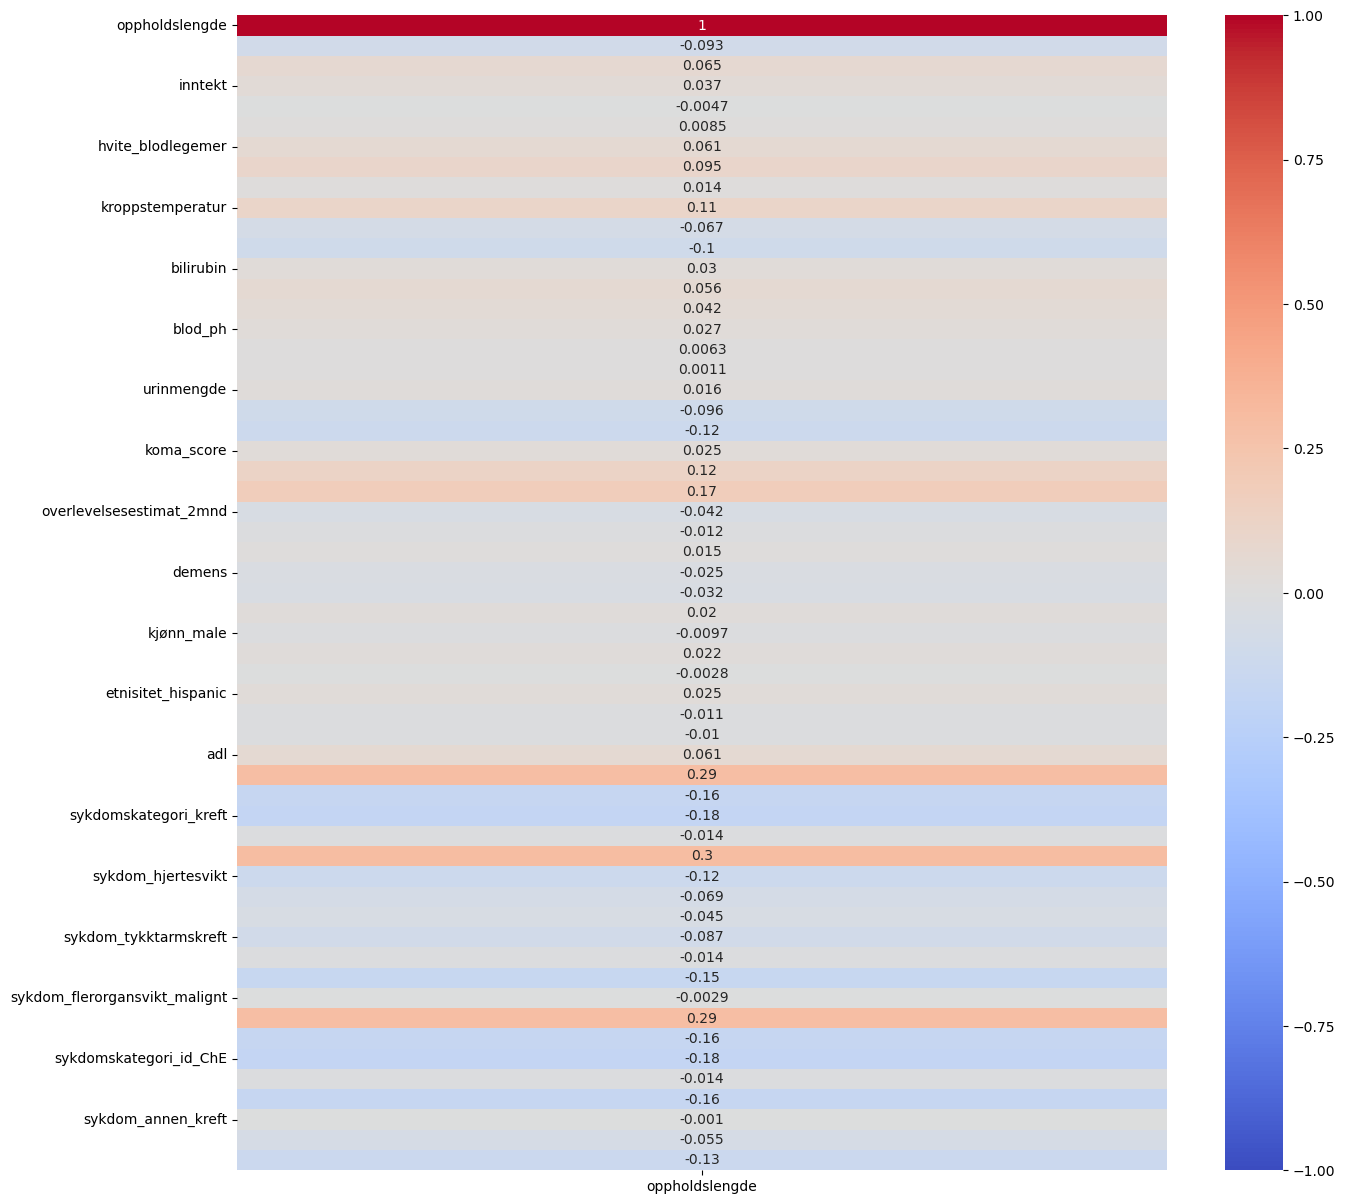

In [68]:
corr_matrix = df_train.corr()
oppholdslengde_corr = corr_matrix[['oppholdslengde']]
sns.heatmap(oppholdslengde_corr, cmap='coolwarm', annot=True, vmin=-1, vmax=1, cbar=True)
plt.gcf().set_size_inches(15, 15)

## Korrelasjonsmatrise avhengig av oppholdslengde delt opp med en terskel på 0.05

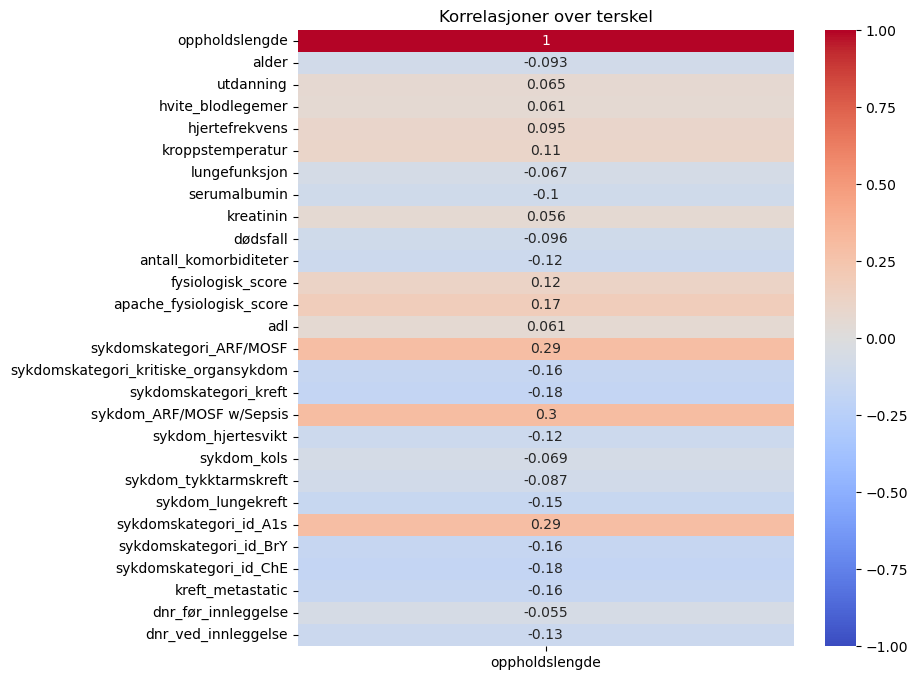

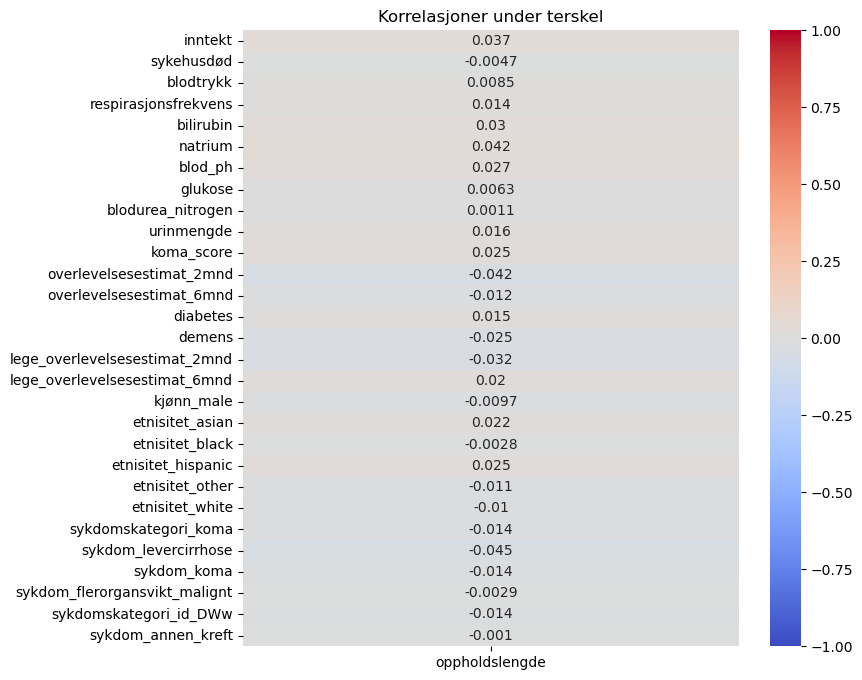

In [69]:
# Beregn korrelasjonsmatrisen
corr_matrix = df_train.corr()

# Velg korrelasjoner med oppholdslengde
oppholdslengde_corr = corr_matrix[['oppholdslengde']]

# Definer terskel
threshold = 0.05

# Del korrelasjonsmatrisen i to
high_corr = oppholdslengde_corr[(oppholdslengde_corr['oppholdslengde'].abs() >= threshold)]
low_corr = oppholdslengde_corr[(oppholdslengde_corr['oppholdslengde'].abs() < threshold)]

# Plot heatmaps for hver del
plt.figure(figsize=(8, 8))
sns.heatmap(high_corr, cmap='coolwarm', annot=True, vmin=-1, vmax=1, cbar=True)
plt.title("Korrelasjoner over terskel")
plt.show()

plt.figure(figsize=(8, 8))
sns.heatmap(low_corr, cmap='coolwarm', annot=True, vmin=-1, vmax=1, cbar=True)
plt.title("Korrelasjoner under terskel")
plt.show()

# Visualisering

## Visualisering av sykehusdata

In [70]:
sykehusdata = {'oppholdslengde', 'sykehusdød'}
for value in sykehusdata:
    fig = px.histogram(df_train, x=value)
    fig.show()

fig = px.box(df_train, x='sykehusdød', y='oppholdslengde')
fig.show()

## Ser på dataen til outliers

In [71]:
long_stay_patients = df_train[df_train['oppholdslengde'] > 100]
long_stay_patients.describe(include='all')

oppholdslengde      alder  utdanning    inntekt  sykehusdød  \
count        75.000000  75.000000  64.000000  37.000000   75.000000   
unique             NaN        NaN        NaN        NaN         NaN   
top                NaN        NaN        NaN        NaN         NaN   
freq               NaN        NaN        NaN        NaN         NaN   
mean        137.386667  56.506667  12.953125   0.810811    0.280000   
std          44.252010  15.576640   3.139253   0.810961    0.452022   
min         101.000000  21.000000   4.000000   0.000000    0.000000   
25%         109.000000  47.500000  12.000000   0.000000    0.000000   
50%         121.000000  58.000000  12.000000   1.000000    0.000000   
75%         153.000000  67.000000  15.250000   1.000000    1.000000   
max         343.000000  86.000000  21.000000   2.000000    1.000000   

         blodtrykk  hvite_blodlegemer  hjertefrekvens  respirasjonsfrekvens  \
count    75.000000          75.000000       75.000000             75.000000   
unique         NaN                NaN             NaN                   NaN   
top            NaN                NaN             NaN                   NaN   
freq           NaN                NaN             NaN                   NaN   
mean     86.066667          13.096497      107.253333             24.173333   
std      32.089964           6.163704       33.035646              9.592189   
min       0.000000           4.500000        0.000000              6.000000   
25%      63.500000           7.999512       78.000000             18.500000   
50%      78.000000          11.599609      112.000000             24.000000   
75%     112.000000          17.949219      127.500000             30.500000   
max     155.000000          33.093750      189.000000             48.000000   

        kroppstemperatur  lungefunksjon  serumalbumin  bilirubin  kreatinin  \
count          75.000000      65.000000     52.000000  52.000000  75.000000   
unique               NaN            NaN           NaN        NaN        NaN   
top                  NaN            NaN           NaN        NaN        NaN   
freq                 NaN            NaN           NaN        NaN        NaN   
mean           37.534063     214.377043      2.774832   2.961384   2.442467   
std             1.229749      94.820071      0.827623   4.800588   2.563222   
min            35.093750      52.000000      0.500000   0.199982   0.399963   
25%            36.500000     140.000000      2.199707   0.599976   0.949951   
50%            37.593750     211.093750      2.649658   1.000000   1.399902   
75%            38.500000     270.000000      3.399902   2.874756   2.749756   
max            40.195310     518.250000      4.199219  29.699219  12.898438   

           natrium    blod_ph     glukose  blodurea_nitrogen   urinmengde  \
count    75.000000  65.000000   35.000000          37.000000    32.000000   
unique         NaN        NaN         NaN                NaN          NaN   
top            NaN        NaN         NaN                NaN          NaN   
freq           NaN        NaN         NaN                NaN          NaN   
mean    139.106667   7.410757  152.457143          30.459459  2270.625000   
std       6.860725   0.090689   84.634975          22.085182  2030.991967   
min     123.000000   7.129883   68.000000           8.000000     0.000000   
25%     134.000000   7.369141   99.000000          14.000000   987.000000   
50%     138.000000   7.419922  117.000000          22.000000  1792.500000   
75%     145.000000   7.469727  182.500000          39.000000  2515.000000   
max     153.000000   7.659180  395.000000          99.000000  9000.000000   

         dødsfall  antall_komorbiditeter  koma_score  fysiologisk_score  \
count   75.000000              75.000000   75.000000          75.000000   
unique        NaN                    NaN         NaN                NaN   
top           NaN                    NaN         NaN                NaN   
freq          NaN               

In [72]:
df_train.describe()

oppholdslengde        alder    utdanning      inntekt   sykehusdød  \
count     5413.000000  5411.000000  4458.000000  3262.000000  5413.000000   
mean        17.646037    62.882462    11.692463     0.669221     0.263994   
std         21.417539    15.563223     3.425327     0.776868     0.440837   
min          3.000000    18.000000     0.000000     0.000000     0.000000   
25%          6.000000    53.000000    10.000000     0.000000     0.000000   
50%         11.000000    65.000000    12.000000     0.000000     0.000000   
75%         20.000000    74.000000    14.000000     1.000000     1.000000   
max        343.000000   102.000000    30.000000     2.000000     1.000000   

         blodtrykk  hvite_blodlegemer  hjertefrekvens  respirasjonsfrekvens  \
count  5413.000000        5287.000000     5413.000000           5413.000000   
mean     84.043137          12.296699       97.163809             23.344541   
std      27.696513           9.112109       31.677984              9.550372   
min       0.000000           0.000000        0.000000              0.000000   
25%      63.000000           7.000000       72.000000             18.000000   
50%      77.000000          10.599609      100.000000             24.000000   
75%     107.000000          15.199219      120.000000             28.000000   
max     195.000000         128.781250      232.000000             70.000000   

       kroppstemperatur  lungefunksjon  serumalbumin    bilirubin  \
count       5413.000000    4032.000000   3421.000000  3879.000000   
mean          37.119087     239.561151      2.951390     2.511476   
std            1.259334     109.983061      0.925699     5.145024   
min           31.699220      12.000000      0.399963     0.099991   
25%           36.195310     155.000000      2.399902     0.500000   
50%           36.695310     223.781250      2.899902     0.899902   
75%           38.195310     304.750000      3.599609     1.899902   
max           41.695310     869.375000     29.000000    54.796875   

         kreatinin      natrium      blod_ph      glukose  blodurea_nitrogen  \
count  5373.000000  5413.000000  4048.000000  2730.000000        2820.000000   
mean      1.792238   137.528173     7.414502   160.983883          32.562766   
std       1.696566     6.040926     0.081907    91.650084          26.841539   
min       0.099991   110.000000     6.829102     1.399902           1.000000   
25%       0.899902   134.000000     7.379883   103.000000          14.000000   
50%       1.199951   137.000000     7.419922   134.000000          24.000000   
75%       1.899902   141.000000     7.469727   191.000000          42.000000   
max      18.398438   181.000000     7.769531  1092.000000         192.000000   

        urinmengde     dødsfall  antall_komorbiditeter   koma_score  \
count  2523.000000  5413.000000            5413.000000  5413.000000   
mean   2171.097474     0.684463               1.860521    12.529281   
std    1440.312021     0.464772               1.329889    25.197060   
min       0.000000     0.000000               0.000000     0.000000   
25%    1172.500000     0.000000               1.000000     0.000000   
50%    1941.000000     1.000000               2.000000     0.000000   
75%    2990.000000     1.000000               3.000000     9.000000   
max    9000.000000     1.000000               7.000000   100.000000   

       fysiologisk_score  apache_fysiologisk_score  overlevelsesestimat_2mnd  \
count        5413.000000                5413.00000               5413.000000   
mean           25.608652                  37.87179                  0.631458   
std            10.040329                  20.05021                  0.250473   
min             0.199982                   0.00000                  0.000000   
25%            19.000000                  23.00000                  0.498962   
50%            24.097656                  35.00000                  0.710938   
75%            30.296875                  49.00000        

## Visualisering av fysiologiske data

In [73]:
# List of physiological data to plot against hospital stay length
fysiologiske_data = ['blodtrykk', 'hvite_blodlegemer', 'hjertefrekvens', 'respirasjonsfrekvens', 'kroppstemperatur', 'lungefunksjon', 'serumalbumin']

# Create a new column that represents if the hospital stay is longer than 150 days
df_train['long_stay'] = df_train['oppholdslengde'] > 150

# Loop through each physiological feature to create scatter plots
for value in fysiologiske_data:
    # Create the scatter plot with color distinction based on the long_stay condition
    fig = px.scatter(
        df_train, 
        x=value, 
        y="oppholdslengde", 
        color='long_stay', 
        labels={'long_stay': 'Long Hospital Stay (>150 days)', 'oppholdslengde': 'Hospital Stay Length'},
        title=f'Scatter Plot of {value} vs. Hospital Stay Length'
    )
    
    # Show the plot
    fig.show()

In [74]:
fysiologiske_data = {'natrium', 'blod_ph', 'glukose', 'blodurea_nitrogen', 'urinmengde', 'bilirubin', 'kreatinin'}
# Create a new column that represents if the hospital stay is longer than 150 days
df_train['long_stay'] = df_train['oppholdslengde'] > 150

# Loop through each physiological feature to create scatter plots
for value in fysiologiske_data:
    # Create the scatter plot with color distinction based on the long_stay condition
    fig = px.scatter(
        df_train, 
        x=value, 
        y="oppholdslengde", 
        color='long_stay', 
        labels={'long_stay': 'Long Hospital Stay (>150 days)', 'oppholdslengde': 'Hospital Stay Length'},
        title=f'Scatter Plot of {value} vs. Hospital Stay Length'
    )
    
    # Show the plot
    fig.show()

## Visualisering sykdom

In [75]:
# Define the disease columns
disease_cols = [
    'sykdomskategori_sepsis', 'sykdom_hjertesvikt', 'sykdomskategori_hjertesvikt', 
    'sykdomskategori_organ_svikt', 'sykdomskategori_lung_hjerte_lever', 'sykdomskategori_kreft', 'sykdomskategori_koma', 'sykdom_hjertesvikt', 
    'sykdom_kols', 'sykdom_levercirrhose', 'sykdom_tykktarmskreft', 'sykdom_koma', 'sykdom_lungekreft', 'sykdom_flerorgansvikt_malignt', 'diabetes'
]

# Melt DataFrame to long format
disease_melted = df_train.melt(
    id_vars=['oppholdslengde'],
    value_vars=disease_cols,
    var_name='Sykdom',
    value_name='HarSykdom'
)

# Filter the melted DataFrame to include only rows where the disease is present (True)
disease_melted = disease_melted[disease_melted['HarSykdom'] == True]

# Create a box plot using Plotly Express
fig = px.box(
    disease_melted,
    x='Sykdom',
    y='oppholdslengde',
    color='Sykdom',
    title='Oppholdslengde etter Sykdom',
    labels={'oppholdslengde': 'Oppholdslengde (dager)', 'Sykdom': 'Sykdom'},
    width=1300,
    height=1000
)

# Adjust layout for better visualization
fig.update_layout(xaxis_tickangle=-45)

# Show the plot
fig.show()

KeyError: "The following id_vars or value_vars are not present in the DataFrame: ['sykdomskategori_sepsis', 'sykdomskategori_hjertesvikt', 'sykdomskategori_organ_svikt', 'sykdomskategori_lung_hjerte_lever']"

In [36]:
sykdomsdata = {'antall_komorbiditeter', 'koma_score', 'adl', 'fysiologisk_score', 'apache_fysiologisk_score', 'overlevelsesestimat_2mnd', 'overlevelsesestimat_6mnd'}
df_train['long_stay'] = df_train['oppholdslengde'] > 150

# Loop through each physiological feature to create scatter plots
for value in sykdomsdata:
    # Create the scatter plot with color distinction based on the long_stay condition
    fig = px.scatter(
        df_train, 
        x=value, 
        y="oppholdslengde", 
        color='long_stay', 
        labels={'long_stay': 'Long Hospital Stay (>150 days)', 'oppholdslengde': 'Hospital Stay Length'},
        title=f'Scatter Plot of {value} vs. Hospital Stay Length'
    )
    
    # Show the plot
    fig.show()

In [81]:
fig = px.scatter(df_train, x='fysiologisk_score', y="oppholdslengde", color='sykehusdød')
fig.show()

Vi ser at fysiologisk score henger sammen med oppholdslengden. Dersom fysiologisk score er lav er oppholdslengden lav, trolig grunnet at pasienten blir frisk. Dersom fysiologisk score er høy, er også oppholdslengden lav men grunnet at pasienten dør tidlig. De pasientene med middels høy fysiologisk score har lengst oppholdslengde grunnet behandlingen de behøver

In [20]:
fig = px.scatter(df_train, x='apache_fysiologisk_score', y="oppholdslengde", color='sykehusdød')
fig.show()

In [19]:
fig = px.scatter(df_train, x='fysiologisk_score', y="oppholdslengde", color='sykdom_MOSF_w/Malig')
fig.show()

ValueError: Value of 'color' is not the name of a column in 'data_frame'. Expected one of ['oppholdslengde', 'alder', 'utdanning', 'inntekt', 'sykehusdød', 'blodtrykk', 'hvite_blodlegemer', 'hjertefrekvens', 'respirasjonsfrekvens', 'kroppstemperatur', 'lungefunksjon', 'serumalbumin', 'bilirubin', 'kreatinin', 'natrium', 'blod_ph', 'glukose', 'blodurea_nitrogen', 'urinmengde', 'dødsfall', 'antall_komorbiditeter', 'koma_score', 'fysiologisk_score', 'apache_fysiologisk_score', 'overlevelsesestimat_2mnd', 'overlevelsesestimat_6mnd', 'diabetes', 'demens', 'lege_overlevelsesestimat_2mnd', 'lege_overlevelsesestimat_6mnd', 'kjønn_male', 'etnisitet_asian', 'etnisitet_black', 'etnisitet_hispanic', 'etnisitet_other', 'etnisitet_white', 'adl', 'sykdomskategori_sepsis', 'sykdomskategori_hjertesvikt', 'sykdomskategori_organ_svikt', 'sykdomskategori_lung_hjerte_lever', 'sykdomskategori_kreft', 'sykdomskategori_koma', 'sykdom_hjertesvikt', 'sykdom_kols', 'sykdom_levercirrhose', 'sykdom_tykktarmskreft', 'sykdom_koma', 'sykdom_lungekreft', 'sykdom_flerorgansvikt_malignt', 'kreft_metastatic', 'sykdom_Other_Cancer', 'dnr_før_innleggelse', 'dnr_ved_innleggelse'] but received: sykdom_MOSF_w/Malig

## Visualisering av demografiske data

In [261]:
demografiske_data = [
    'kjønn_male',  
    'inntekt', 
    'etnisitet_asian', 
    'etnisitet_black', 
    'etnisitet_hispanic', 
    'etnisitet_other', 
    'etnisitet_white', 
]

df_train[demografiske_data] = df_train[demografiske_data].astype(bool)

# Smelt DataFrame til langt format
disease_melted = df_train.melt(
    id_vars=['oppholdslengde'],
    value_vars=demografiske_data,
    var_name='Sykdom',
    value_name='HarSykdom'
)
disease_melted = disease_melted[disease_melted['HarSykdom'] == True]

fig = px.box(
    disease_melted,
    x='Sykdom',
    y='oppholdslengde',
    color='Sykdom',
    title='Oppholdslengde etter Demografiske Data',
    labels={'oppholdslengde': 'Oppholdslengde (dager)', 'Sykdom': 'Sykdom'},
    width=1300,
    height=1000
)

# Juster layout hvis nødvendig
fig.update_layout(xaxis_tickangle=-45)

# Vis plottet
fig.show()


    

In [174]:
manglende_numeriske_data = ['utdanning', 'hvite_blodlegemer', 'lungefunksjon', 'serumalbumin', 'bilirubin', 'kreatinin', 'blod_ph', 'glukose', 'blodurea_nitrogen', 'urinmengde']
manglende_kategoriske_data = ['etnisitet', 'inntekt']

for value in manglende_numeriske_data:
    fig =px.histogram(pasient_info_df, value)
    fig.show()

    